# Time Series Forecasting

`WORK IN PROGRESS`

## References

- [Wikipedia](https://en.wikipedia.org/wiki/Time_series)
- [Tableau TS doc](https://www.tableau.com/learn/articles/time-series-forecasting)
- [Tensorflow](https://www.tensorflow.org/tutorials/structured_data/time_series)

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import spearmanr, pearsonr
from mightypy.ml.utils import moving_window_matrix # This is my package

plt.style.use('seaborn')
plt.rcParams.update({
    "figure.figsize" : (15, 8)
})

## Introduction to Time Series

\begin{align}
    \{X_1, X_2, ..., X_T\}
\end{align}

- Time series forecasting occurs when you make scientific predictions based on historical time stamped data. It involves building models through historical analysis and using them to make observations and drive future strategic decision-making.
- Time series is any sequence record over time eg.- hourly, daily, weekly etc. 

Some applications of Time Series - 

- Interpretation : make sense of the data and capture changes/ dynamics.
- Modeling and Forecasting : Understanding aspects of data and create models for predictions/ future forecast.
- Filtering/ Smoothing : Process the data.

### Basic Model

Timeseries data has this basic composition.

\begin{align}
    X_t &= T_t + S_t + C_t + I_t
\end{align}
> This represents an additive model, yeah I can see addition signs.



\begin{align}
    X_t &= T_t \times S_t \times C_t \times I_t
\end{align}
> This represents a multiplicative model.

Where

- $X_t$ = Trend : General direction of data. long-term progression of series.
- $S_t$ = Seasonal : component fixed and known period, distinct repeated patterns for regular intervals like yearly, quarterly, monthly, weekly etc. like sell count of xmas trees at the time of xmas.
- $C_t$ = Cyclical : `Optional` component that is repeatative but doesn't happen at fixed intervals.
- $I_t$ = Residuals : fluctuations in time series after removing trend, seasonal and cyclic variations.

`Each observation in the series can be expressed as either a sum or a product of the components.` 

More on this matter is explained in Seasonal Decomposition section.

## Load Data

In [2]:
df = pd.read_csv('/opt/datasetsRepo/stock.csv')

### Preprocessing

In [3]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df['Close'] = df['Close'].apply(lambda x: float(x.replace(',','')))
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',','')))
df.index = df['Date']

df.head(3)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,6590300.0


### How does the data look like ?

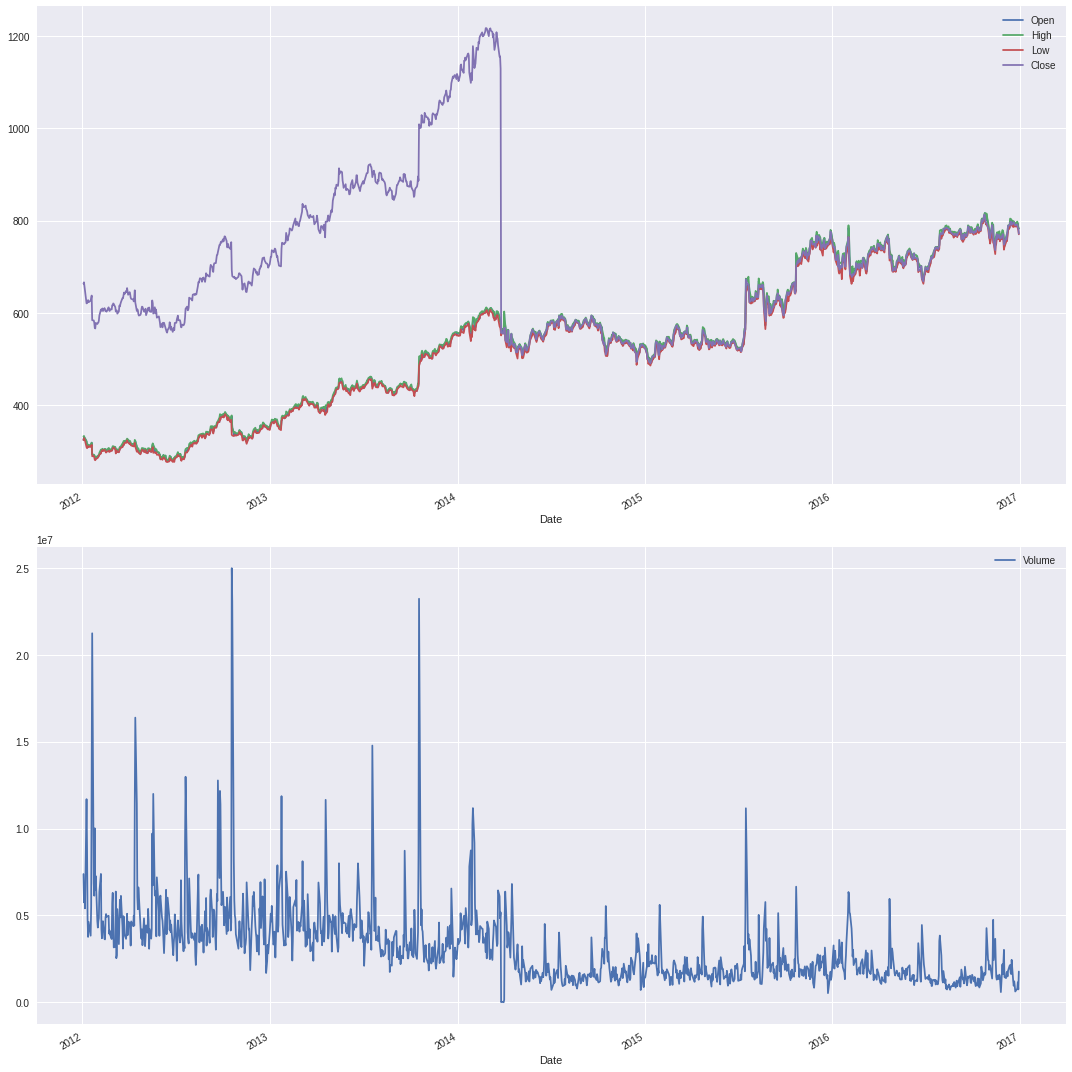

In [4]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
df.plot(y=['Open','High','Low','Close'], ax=ax[0])
df.plot(y=['Volume'], ax=ax[1])

plt.tight_layout()
plt.show()

### lets see monthly data stats using box plot

In [5]:
df['Month-Year'] = df['Date'].apply(lambda x : datetime.strftime(x, '%m-%Y')); df.head(3)

,Date,Open,High,Low,Close,Volume,Month-Year
Date,,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,7380500.0,01-2012
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,5749400.0,01-2012
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,6590300.0,01-2012


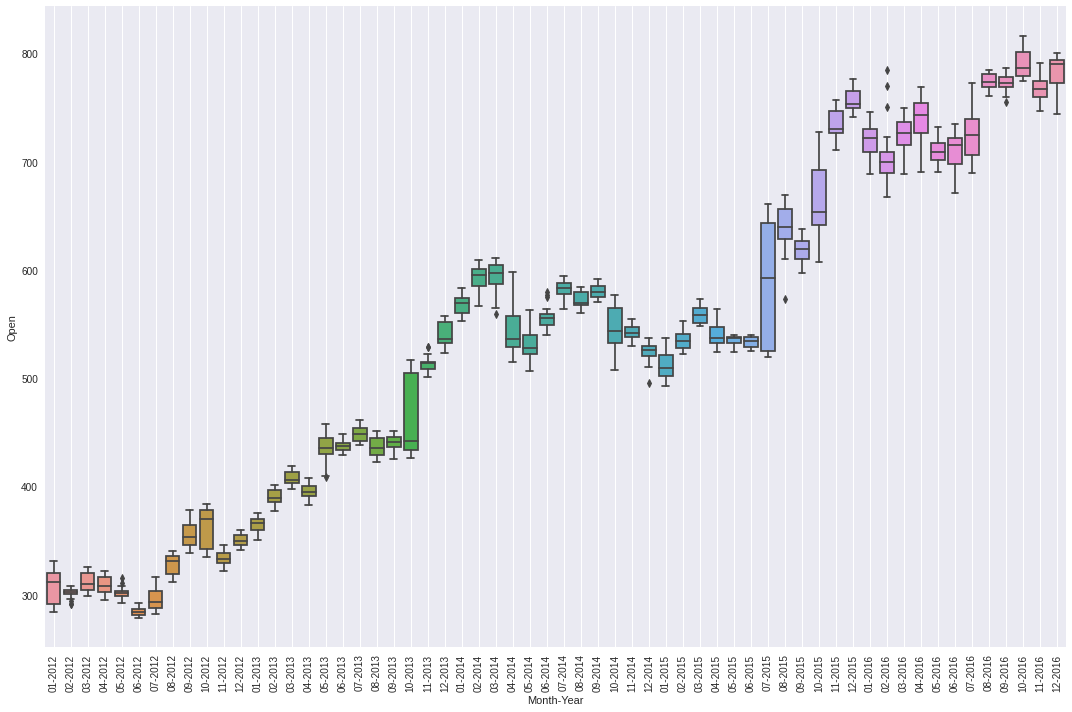

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

sns.boxplot(data=df, x='Month-Year',y='Open', ax=ax)

plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

## Seasonal Decompostion

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
data = df['Open']

### Multiplicative Model

\begin{align}
    X_t &= T_t \times S_t \times C_t \times I_t\\
    \log{X_t} &= \log{T_t} + \log{S_t} + \log{C_t} + \log{I_t}
\end{align}

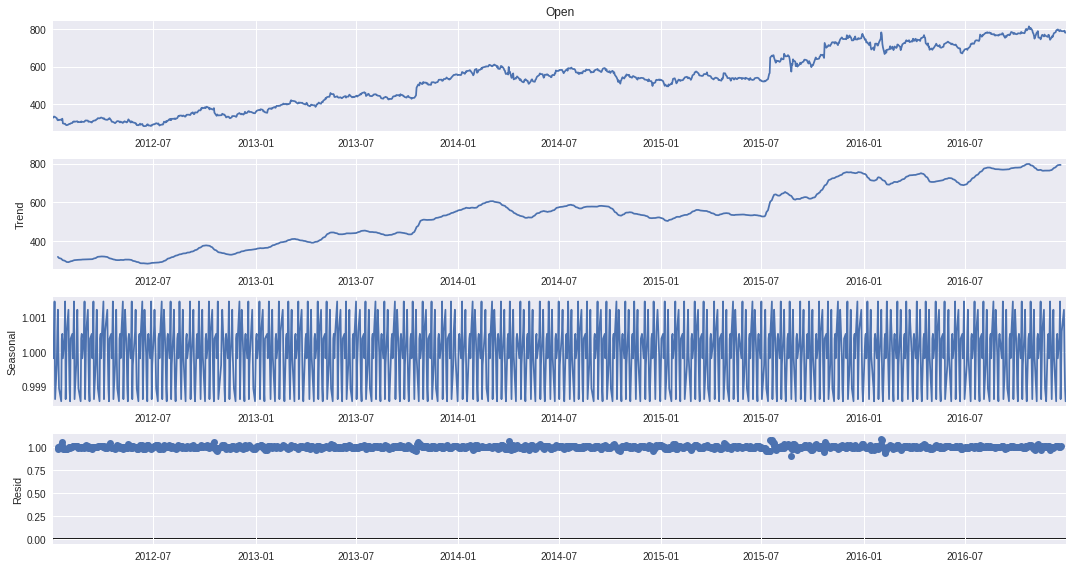

In [9]:
decomposition = seasonal_decompose(data, period=12, model='muplicative')
fig = decomposition.plot()
plt.show()

### Additive Model

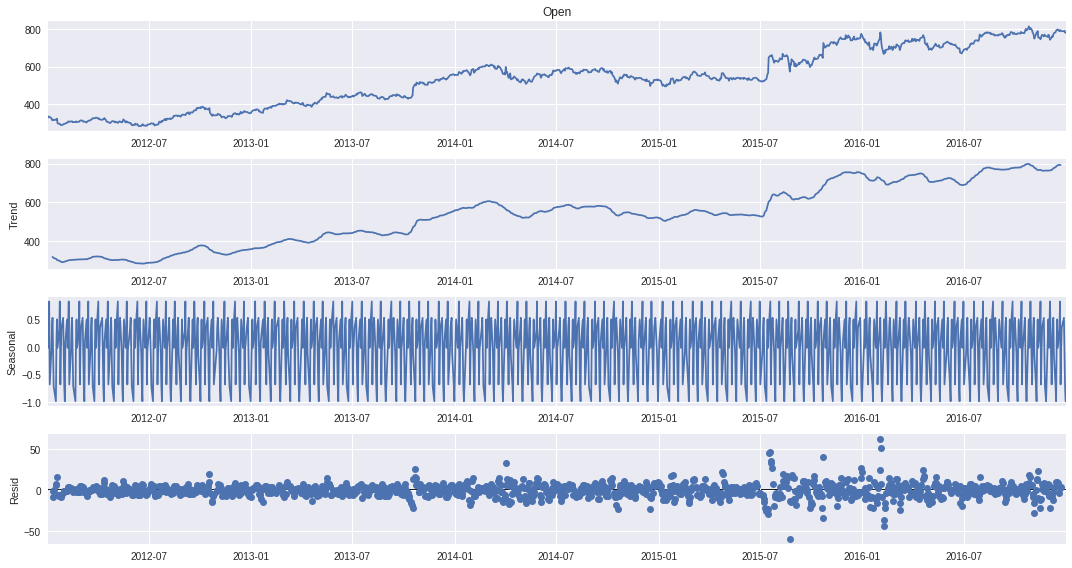

In [20]:
decomposition = seasonal_decompose(data, period=12, model='additive')
fig = decomposition.plot()
plt.show()

## Stationarity 

To define things more formally, a stationary time series is one whose unconditional joint probability distribution does not change when shifted in time. This implies that parameters such as mean and variance also do not change over time.

`Data is statistically stationary over time series`

## Kolmogorov extension theorem

## AutoCorrelation & Partial AutoCorrelation

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
data = df['Open']

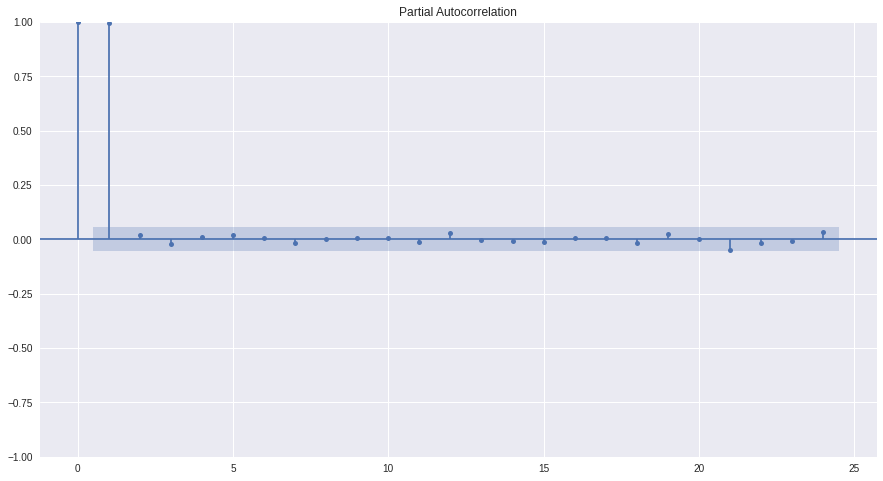

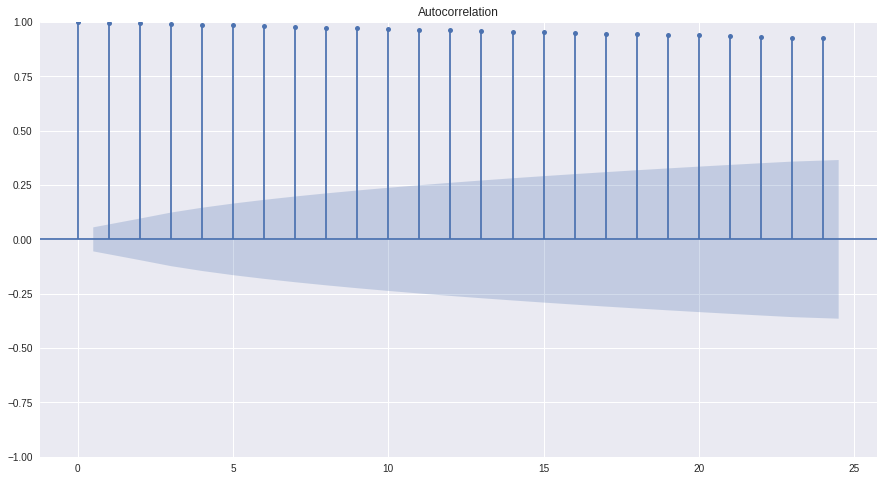

In [16]:
LAGS = 24
plot_pacf(data, lags=LAGS, method='ywm'); plot_acf(data, lags=LAGS); print()

## Exponential Smoothing

## Prophet

## Auto Regression Model

## Moing Average Model

## ARIMA